## Changelog

#### 06/02/25
- I have found a image classification dataset from this link (https://archive.ics.uci.edu/dataset/229/skin+segmentation)
- For this model I will be using a Support Vector Machine, I am using this as they can be effective on image classifcation models due to the following reasons:
    1. They work well with small to medium sized datasets (anything not in the millions)
    2. There isn't a lot of features in my dataset so it won't be computationally intense
    3. They are strong with binary classification which fits with my selected dataset
- This dataset is taken from the University of California, Irvine website
- This dataset contains 245,000 rows and it has 4 columns, the first three are the RGB (Red,Green,Blue) values of the image and then the fourth is a binary value that states whether it is or isn't skin
- I wanted to try this dataset as it will be a challenge working with image classifcation as I haven't used it in the past.

#### 11/02/25
- I currently have a big overfitting issue with parts of my data. This was initially due to me accidentally using the sample data to test it. I have played around with the C and gamma ratings and gotten it much lower however certain values are still overfitting.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ds = pd.read_csv('Skin_NonSkin.txt', sep='\t', header=None, names=['B', 'G', 'R', 'Skin'])
print(ds.head())

# This is just to import the needed libraries and load the dataset

    B   G    R  Skin
0  74  85  123     1
1  73  84  122     1
2  72  83  121     1
3  70  81  119     1
4  70  81  119     1


The data is currently quite unorganised, I want to add some labels to the columns as it will help me visualise it better

SOLUTION - I did this by adding the names into the read_csv function when importing the dataset to pandas

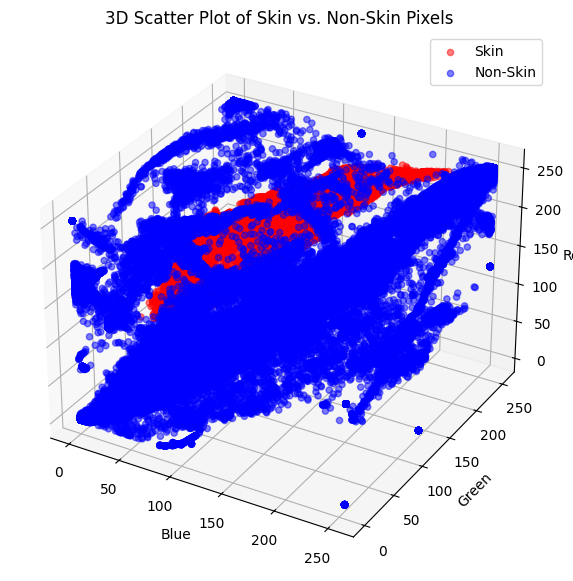

In [13]:
skin = ds[ds["Skin"] == 1]
non_skin = ds[ds["Skin"] == 2]

# Create a 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot skin and non-skin points
ax.scatter(skin["B"], skin["G"], skin["R"], c='red', label="Skin", alpha=0.5)
ax.scatter(non_skin["B"], non_skin["G"], non_skin["R"], c='blue', label="Non-Skin", alpha=0.5)

# Labels and Title
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.set_title("3D Scatter Plot of Skin vs. Non-Skin Pixels")
ax.legend()

# Show the plot
plt.show()

#  ChatGPT partially helped me with this code, I had to use a 3d scatter plot to show the data in 3 dimensions as I wanted to show all of the rgb values on the same plot. - AD

This is working correctly but due to the amount of values that I have in my dataset it is a little bit unreadable and visually doesn't show it well, I'm going to try and take a sample of the data and plot that as with less datapoints it might make it a little bit easier to read

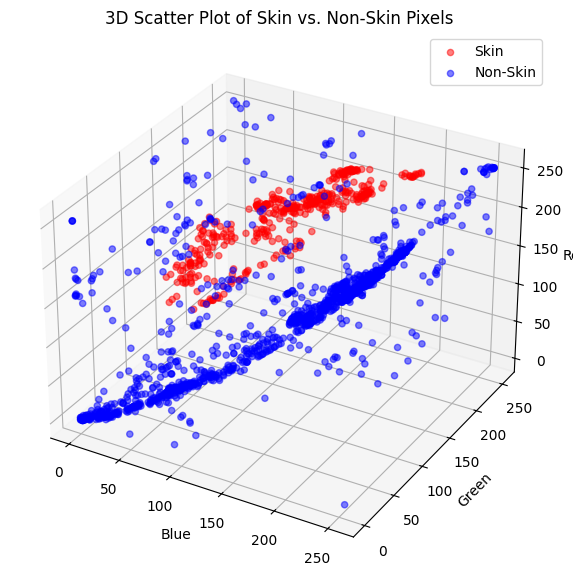

In [14]:
data_sample = ds.sample(n=2000, random_state=42)

skin = data_sample[data_sample["Skin"] == 1]
non_skin = data_sample[data_sample["Skin"] == 2]

# Create a 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot skin and non-skin points
ax.scatter(skin["B"], skin["G"], skin["R"], c='red', label="Skin", alpha=0.5)
ax.scatter(non_skin["B"], non_skin["G"], non_skin["R"], c='blue', label="Non-Skin", alpha=0.5)

# Labels and Title
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
ax.set_title("3D Scatter Plot of Skin vs. Non-Skin Pixels")
ax.legend()

# Show the plot
plt.show()

This is now much more readable and you can see where the cluster of Skin rgb values are, I did this by taking a random sample from my dataset with random state 42, this is just to make sure we get the same random values each time that it runs for consistency of the model.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ds = pd.read_csv('Skin_NonSkin.txt', sep='\t', header=None, names=['B', 'G', 'R', 'Skin'])

X = ds.drop('Skin', axis=1)
y = ds['Skin']

y = y.replace({2: 0})  # Convert 2 (Non-Skin) to 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel='rbf', C=0.2, gamma=0.0005, class_weight='balanced')


#  This is splitting the data into training and testing data using an 80/20 split - AD

clf.fit(X_train, y_train)

SVC(C=0.2, class_weight='balanced', gamma=0.0005)

Getting the model to fit caused me a lot of trouble, initially I tried just fitting it normally as I did with previous models without class weights, gamma, standardScaler() and c values for example.

First of all I started off by using a linear SVM and this was massively overfitting to the model, I then researched the different types and came across the RBF Kernel. This seemed like a way better fit for my dataset as when you look at the 3D plot that I created earlier it isn't a linear group that can be seen for the skin rgb values, RBF is more computationally intense but it is much better at finding nicher patterns which is what I believe is necessary for predicting this model. It also works well with 3d data which is a perfect fit for the dataset that I am using in this model. This research took me about 30 minutes as I wanted to look in depth at the different types of kernels to use for this model. I learned about the different types of kernel from a few places but this (https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py) was where I got the best understanding from.

I was getting it massively overfitting to the training data and I was unsure as to why. I asked ChatGPT and it gave me some reasons as to why my dataset might be overfitting, it told me to use class weights which I have used before on different models so I understand they work well when one value is a lot more prominent in a dataset which does apply here as there are a lot more non-skin values than skin ones. However this didn't fix my issue.

My next step was manually changing the C and Gamma values for the model. I had to research what these meant as I didn't know what they were at first, I spent about 20 minutes researching what these are. The C value in simple terms is the value that control how strict the model is, so if you have a high C value in the SVC it means that you are forcing the model to predict everything perfectly which can lead to fitting but it can also be more accurate if done right and a lower C value allows the model to make more mistakes and leads to a more general result but it does decrease the chances of the model overfitting to the data. I learned this from the link here (https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel). The Gamma value 

In [ ]:
labels = clf.predict(X_test)

from sklearn.metrics import classification_report

classification_report(y_test, labels, target_names=['Non-Skin', 'Skin'])

print(classification_report(y_test, labels, target_names=['Non-Skin', 'Skin']))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
print("Mean F1-score (Cross-Validation):", scores.mean())


              precision    recall  f1-score   support

    Non-Skin       1.00      0.92      0.96     38940
        Skin       0.93      1.00      0.96     38740

    accuracy                           0.96     77680
   macro avg       0.96      0.96      0.96     77680
weighted avg       0.96      0.96      0.96     77680

